In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
ds = pd.read_csv("tested.csv")
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# checking and removing missing values

In [5]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
ds.shape

(418, 12)

In [7]:
ds.groupby("Survived").mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2516\3481357876.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ds.groupby("Survived").mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.272732,0.379699,0.274436,27.527877
1,1096.789474,2.144737,30.272362,0.565789,0.598684,49.747699


In [8]:
ds1 = ds.drop(columns=["Cabin", "Age"], axis=1)

In [9]:
ds1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


<Axes: >

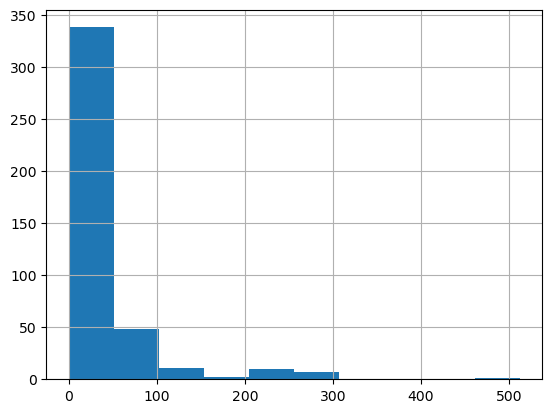

In [10]:
ds1["Fare"].hist()

In [11]:
ds1.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,8.000000,9.000000,512.329200


In [12]:
fare_mean = ds1["Fare"].mean()

In [13]:
ds1["Fare"].replace(np.nan, fare_mean, inplace=True)

In [14]:
ds1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
ds1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


# Encoding categorical variables

In [16]:
ds1 = ds1.drop(columns=["Ticket"], axis = 1)

In [17]:
ds1.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S


In [18]:
c = pd.get_dummies(ds1["Sex"])

In [19]:
c

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [20]:
ds2 = pd.concat([ds1, c], axis = 1)

In [21]:
ds2

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,female,male
0,892,0,3,"Kelly, Mr. James",male,0,0,7.8292,Q,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,0,1
3,895,0,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0,0,8.0500,S,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,0,0,108.9000,C,1,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,0,0,7.2500,S,0,1
416,1308,0,3,"Ware, Mr. Frederick",male,0,0,8.0500,S,0,1


<Axes: >

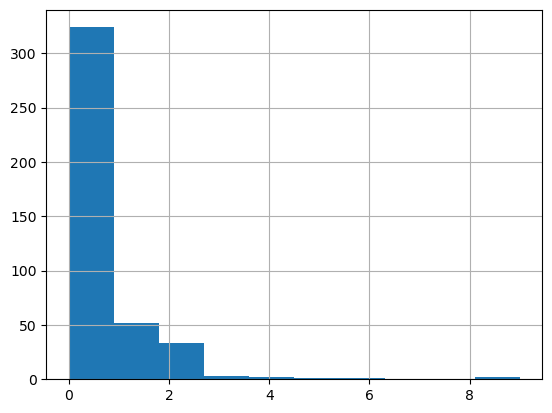

In [22]:
ds1["Parch"].hist()

<Axes: >

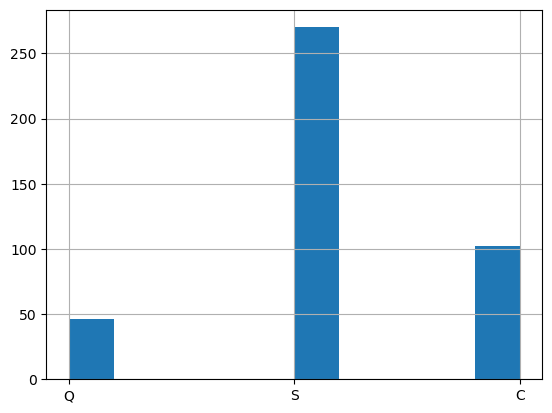

In [23]:
ds1["Embarked"].hist()

In [24]:
c1 = pd.get_dummies(ds1["Embarked"])

In [25]:
ds3 = pd.concat([ds2, c1], axis = 1)

In [26]:
ds3 = ds3.drop(columns=["PassengerId", "Sex", "female", "Embarked", "Name"], axis = 1)

In [27]:
ds3

,Survived,Pclass,SibSp,Parch,Fare,male,C,Q,S
0,0,3,0,0,7.8292,1,0,1,0
1,1,3,1,0,7.0000,0,0,0,1
2,0,2,0,0,9.6875,1,0,1,0
3,0,3,0,0,8.6625,1,0,0,1
4,1,3,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,0,0,8.0500,1,0,0,1
414,1,1,0,0,108.9000,0,1,0,0
415,0,3,0,0,7.2500,1,0,0,1
416,0,3,0,0,8.0500,1,0,0,1


# Splitting the data

In [28]:
X = ds3.iloc[:,1:]

In [29]:
y = ds3.iloc[:,0]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(334, 8)
(334,)
(84, 8)
(84,)


# Applying logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression()

In [35]:
logreg.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
predictions1 = logreg.predict(x_test)

In [38]:
accuracy_score(predictions1, y_test)

1.0